In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install xgboost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

In [2]:
df = pd.read_csv("Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [ ]:
df.describe()

In [ ]:
sns.heatmap(df.isna())# to visualise null values. There are no null values

In [6]:
#Define X and Y
x=df.iloc[:,:-1] # all rows, all columns except last column
y=df['Customer_Segment']

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#Build individual model first. Check whether single model performing well or when we bag, it is performing well.
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)
print(classification_report(ytest,ypred))#get confusion matrix
print('Train Accuracy: ',lg.score(xtrain,ytrain))
print('Test Accuracy: ',lg.score(xtest,ytest))

In [ ]:
# model is overfitted



# **Bagging** **Classifier**

In [9]:
#bg=BaggingClassifier(DecisionTreeClassifier(),n_estimators=20)
bg=BaggingClassifier(DecisionTreeClassifier())
#base_estimator: for which algorithm you want to creat bagging classifier like knn or logistic
#n_estimators: for base estimator algo. how many models you want to create. Its a hyper parameter
#base estimator is same for all algorithm.

In [10]:
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))
print('Train Accuracy: ',bg.score(xtrain,ytrain))
print('Test Accuracy: ',bg.score(xtest,ytest))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy:  1.0
Test Accuracy:  0.9722222222222222


In [ ]:
#as we are doing same for diff algorithms so create a function which will build model and print accuracy
# write prediction function
def predictor(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)
  print('Train Accuracy: ',model.score(xtrain,ytrain))
  print('Test Accuracy: ',model.score(xtest,ytest))
  print(classification_report(ytest,ypred))

In [ ]:
predictor(DecisionTreeClassifier())

In [ ]:
predictor(BaggingClassifier(DecisionTreeClassifier()))

In [ ]:
predictor(LogisticRegression())

In [ ]:
predictor(KNeighborsClassifier()) # No feature scaling done so less accuracy

In [ ]:
predictor(BaggingClassifier(KNeighborsClassifier())) # may be after bagging (for 10 KNN algorithms) accuracy will increase

# **Boosting** **Classifier**

In [ ]:
predictor(AdaBoostClassifier())
# huge difference between train and test accuracy - uses stump

In [ ]:
predictor(GradientBoostingClassifier())# much better than adaboost - as uses fully grown tree, it works on residuals (tries to correct previous errors)
# this is only on one train and test data. Try for kfold

K-Fold Cross Validation

In [ ]:
kf=KFold(n_splits=10)
score=cross_val_score(GradientBoostingClassifier(),x,y,cv=kf)
score

In [ ]:
# gradient boosting is performing well. Final accuracy will be avg of all
score.mean()

In [ ]:
predictor(XGBClassifier()) # some may get error.
# in target column, Customer_Segment we have class numbers as 1,2,3
#new version requires classification should start from 0. It expects class as 0,1,2


<Axes: ylabel='count'>

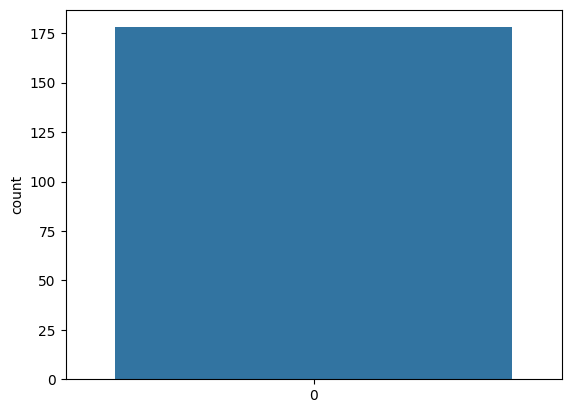

In [ ]:
# check class of datset
sns.countplot(df['Customer_Segment'])

In [ ]:
# to change 1,2,3 to 0,1,2 perform label encoding
le = LabelEncoder()
y=le.fit_transform(y)
y

In [ ]:
df['Customer_Segment']=y
x=df.iloc[:,:-1] # all rows, all columns except last column
y=df['Customer_Segment']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
predictor(XGBClassifier())

# **Voting and Stacking Classifier**

In [ ]:
# create a list of algorithms
models=[]
models.append(('lr',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))
models.append(('knn',KNeighborsClassifier()))
models.append(('rf',RandomForestClassifier()))

In [ ]:
predictor(VotingClassifier(estimators=models))


In [ ]:
predictor(StackingClassifier(estimators=models,final_estimator=RandomForestClassifier()))
#suppose we have x,y and we are using M1,M2,M3. Outputs of these models are say y1,y2,y3
# if you are using final model as Random Forest model then it will use y and y1,y2,y3 as x variables
